<a href="https://colab.research.google.com/github/DiasMelissa/DataScience/blob/main/statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
import pandas as pd
import numpy as np
from math import ceil
from sklearn.model_selection import train_test_split
from scipy import stats
from scipy.stats import norm, skewnorm
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('/content/iris.csv')
data

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [5]:
np.random.seed(2534)
sample = np.random.choice(a = [0, 1], size = 150, replace = True,
                          p = [0.7, 0.3])

len(sample)

len(sample[sample == 1])
len(sample[sample == 0])
# sample

96

In [6]:
dataFinal = data.loc[sample == 0]
dataFinal.shape

(96, 5)

In [11]:
population = 150
sample = 15
k = ceil(population / sample)
k

10

In [13]:
r = np.random.randint(low = 1, high = k + 1, size = 1)
r

array([2])

In [14]:
accumulator = r[0]
randomizer = []

for i in range(sample):
  randomizer.append(accumulator)
  accumulator += k
randomizer

[2, 12, 22, 32, 42, 52, 62, 72, 82, 92, 102, 112, 122, 132, 142]

In [15]:
len(randomizer)

15

In [16]:
data = pd.read_csv('/content/iris.csv')
dataFinal = data.loc[randomizer]
dataFinal

,sepal length,sepal width,petal length,petal width,class
2,4.7,3.2,1.3,0.2,Iris-setosa
12,4.8,3.0,1.4,0.1,Iris-setosa
22,4.6,3.6,1.0,0.2,Iris-setosa
32,5.2,4.1,1.5,0.1,Iris-setosa
42,4.4,3.2,1.3,0.2,Iris-setosa
52,6.9,3.1,4.9,1.5,Iris-versicolor
62,6.0,2.2,4.0,1.0,Iris-versicolor
72,6.3,2.5,4.9,1.5,Iris-versicolor
82,5.8,2.7,3.9,1.2,Iris-versicolor
92,5.8,2.6,4.0,1.2,Iris-versicolor


In [18]:
data['class'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: class, dtype: int64

In [19]:
X, _, y, _ = train_test_split(data.iloc[:, 0:4], data.iloc[:, 4],
                              test_size = 0.5, stratify = data.iloc[:, 4])
y.value_counts()

Iris-setosa        25
Iris-versicolor    25
Iris-virginica     25
Name: class, dtype: int64

In [22]:
infert = pd.read_csv('/content/infert.csv')
infert

,Unnamed: 0,education,age,parity,induced,case,spontaneous,stratum,pooled.stratum
0,1,0-5yrs,26,6,1,1,2,1,3
1,2,0-5yrs,42,1,1,1,0,2,1
2,3,0-5yrs,39,6,2,1,0,3,4
3,4,0-5yrs,34,4,2,1,0,4,2
4,5,6-11yrs,35,3,1,1,1,5,32
...,...,...,...,...,...,...,...,...,...
243,244,12+ yrs,31,1,0,0,1,79,45
244,245,12+ yrs,34,1,0,0,0,80,47
245,246,12+ yrs,35,2,2,0,0,81,54
246,247,12+ yrs,29,1,0,0,1,82,43


In [23]:
infert['education'].value_counts()

6-11yrs    120
12+ yrs    116
0-5yrs      12
Name: education, dtype: int64

In [26]:
X1, _, y1, _ = train_test_split(infert.iloc[:, 2:9], infert.iloc[:, 1],
                              test_size = 0.6, stratify = infert.iloc[:, 1])
y1.value_counts()

6-11yrs    48
12+ yrs    46
0-5yrs      5
Name: education, dtype: int64

In [28]:
players = [50000, 19000, 60000, 90000, 100000, 18000, 15000, 60000, 40000]
np.mean(players)

50222.22222222222

In [29]:
np.median(players)

50000.0

In [31]:
quartiles = np.quantile(players, [0, 0.25, 0.5, 0.75, 1])
quartiles

array([ 15000.,  19000.,  50000.,  60000., 100000.])

In [32]:
np.std(players, ddof = 1)

30841.440375644655

In [33]:
stats.describe(players)

DescribeResult(nobs=9, minmax=(15000, 100000), mean=50222.22222222222, variance=951194444.4444444, skewness=0.3592613205366589, kurtosis=-1.0976146445214383)

In [35]:
norm.cdf(6, 8, 2)

0.15865525393145707

In [36]:
norm.sf(6 , 8 , 2)
1 - norm.cdf(6, 8, 2)

0.8413447460685429

In [37]:
norm.cdf(6 , 8 , 2) + norm.sf(6 , 8 , 2)

1.0

In [38]:
norm.cdf(10, 8 , 2) - norm.cdf(8, 8 , 2)

0.3413447460685429

In [40]:
data = norm.rvs(size = 1000)
data

array([ 0.48161355,  0.1373438 ,  0.09487937, -1.81608506,  0.39912396,
       -0.30474421, -0.30062668,  0.52948216,  0.70406765, -0.06051468,
       -0.54889462, -1.22530265,  0.04961136, -0.55438384, -1.72326964,
        1.74332863,  0.15319995, -1.48463738, -0.16378422, -0.48850993,
        0.10227953,  0.13028924, -0.97572463,  1.95334645, -0.11641285,
        0.26412199,  1.24202286, -1.12401925, -1.4513232 , -2.33461516,
       -0.38542886,  0.61243258,  1.56294068,  1.84329935, -0.34449302,
        0.46610449,  1.31485058, -0.83967183,  0.89335387,  0.95248586,
       -1.47595872,  1.15858145,  0.28541241, -0.76266323,  0.9563015 ,
        2.02568584, -2.14442766,  0.69454308,  1.32306135,  0.15367765,
       -0.03811374, -0.21091248, -2.09966877, -0.14829006,  0.82196812,
        1.32928029, -0.07263986,  0.98212723,  0.77472   , -0.9015701 ,
       -0.11112469, -2.01767534, -0.12885345, -0.57247176,  0.07567511,
        0.58975477,  2.03281345, -0.88941708, -0.66632043, -1.30

Text(0.5, 1.0, 'Data')

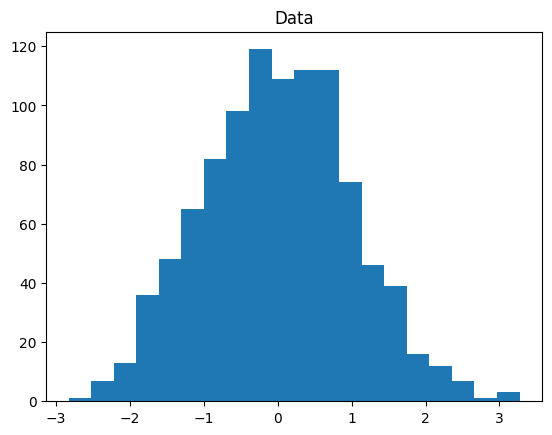

In [41]:
plt.hist(data, bins = 20)
plt.title('Data')

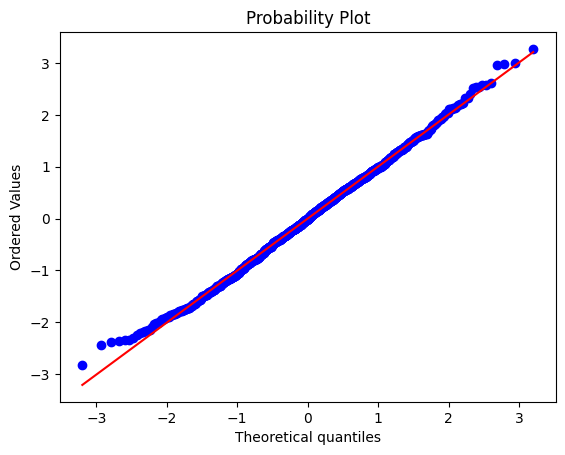

In [42]:
fig, ax = plt.subplots()
stats.probplot(data, fit = True, plot =ax)
plt.show()

In [43]:
stats.shapiro(data)

ShapiroResult(statistic=0.9977816343307495, pvalue=0.20279721915721893)

In [44]:
data2 = skewnorm.rvs(4, size = 1000)
data2

array([-6.26060675e-02,  1.21210487e+00,  3.30799670e-01, -5.05172769e-02,
        1.46241926e+00,  7.85603130e-01,  1.41034598e+00,  1.81463575e+00,
        5.83258533e-01,  1.87355108e-01,  1.76858032e+00,  3.03915488e-02,
        8.01248393e-01,  5.95369846e-01,  1.30788606e+00, -1.86876129e-01,
        1.23214505e+00,  7.34171053e-01,  1.41659855e-01,  9.65768508e-01,
        1.83952420e+00,  9.09020191e-01,  2.44724344e+00,  4.34012886e-01,
        1.39638283e+00,  9.32022195e-03,  1.01677234e+00,  5.66877243e-02,
        2.84893473e-01,  3.52784672e-01, -5.22133733e-02,  6.10719518e-01,
        5.24366287e-01,  1.81665400e-01,  1.36482544e-01,  2.61426189e+00,
        3.14379655e-02,  1.17460868e+00,  1.06357102e+00,  4.78825700e-01,
        9.92970786e-01,  3.97752150e-01,  2.07313172e-01,  3.65745447e-01,
        5.65789497e-01,  6.61906225e-01,  1.38446029e+00,  4.77773589e-01,
       -1.65213395e-01,  1.00578215e+00,  3.77681571e-01,  9.90844126e-01,
        9.21827174e-01,  

Text(0.5, 1.0, 'Data')

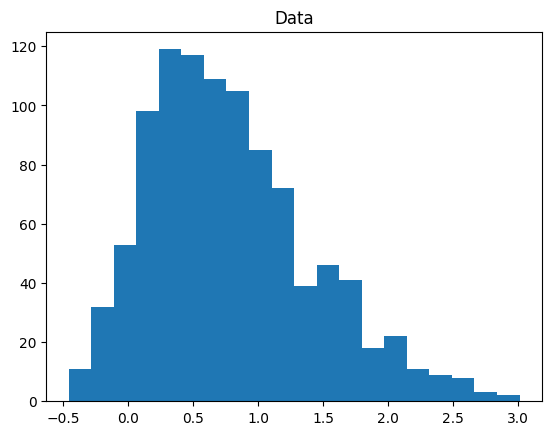

In [45]:
plt.hist(data2, bins = 20)
plt.title('Data')

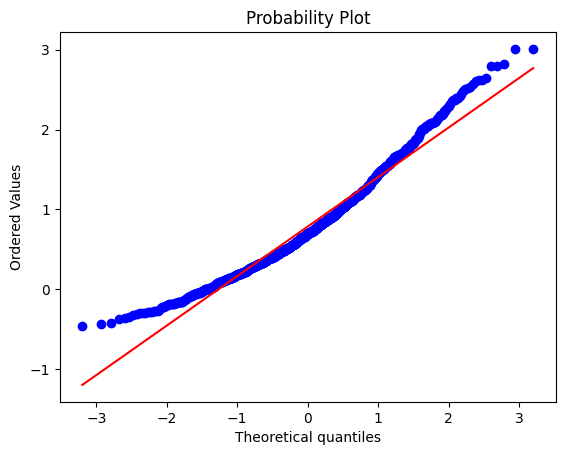

In [47]:
fig, ax = plt.subplots()
stats.probplot(data2, fit = True, plot =ax)
plt.show()

In [49]:
stats.shapiro(data2)

ShapiroResult(statistic=0.9650436639785767, pvalue=9.300014338004588e-15)